IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
df_1=df_1.drop_duplicates()
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            96.0    3.596543    3.414090 -0.014483  ...  1316

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      40.0 -0.028366   0.009928    2.166222   0.103478         65.0   
1      13.0 -0.035580   0.016914   -0.435153   0.134662         96.0   
2      41.0 -0.020708   0.018073    3.843965   0.135852          0.0   
3       7.0 -0.034101   0.016963   -0.420144   0.134457        108.0   
4       0.0 -0.011376   0.005900   -0.249248   0.077541         64.0   
...     ...       ...        ...         ...        ...          ...   
1344   53.0 -0.049797   0.006290   -0.098271   0.093562          0.0   
1345   39.0 -0.024870   0.007156   -0.544386   0.088070        103.0   
1346   60.0  0.004130   0.051827    2.393543   0.227416         84.0   
1347   26.0 -0.041440   0.026685    1.545773   0.168321         83.0   
1348   27.0 -0.137391   0.032917   -0.751516   0.227389          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            88.0    4.667286    4.611511 -0.008825  ...   871

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.028366   0.009928    2.166222   0.103478         65.0         88.0   
1    -0.035580   0.016914   -0.435153   0.134662         96.0         70.0   
2    -0.020708   0.018073    3.843965   0.135852          0.0        100.0   
3    -0.034101   0.016963   -0.420144   0.134457        108.0         89.0   
4    -0.011376   0.005900   -0.249248   0.077541         64.0         87.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.049797   0.006290   -0.098271   0.093562          0.0        116.0   
1345 -0.024870   0.007156   -0.544386   0.088070        103.0         80.0   
1346  0.004130   0.051827    2.393543   0.227416         84.0        108.0   
1347 -0.041440   0.026685    1.545773   0.168321         83.0         82.0   
1348 -0.137391   0.032917   -0.751516   0.227389          0.0        104.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index([], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(C13)', '<>(C14)', 'var(C14)', 'kurt(C14)', 'RMS(C14)',
       'freq1(C14)', 'freq2(C14)', 'amp1(C14)', 'amp2(C14)', 'Guasto'],
      dtype='object', length=121)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.066689   0.010576    0.878041   0.122458          0.0         76.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(C13)  \
340   12.141309    3.570863  0.019565   0.007244  ...  1514.851322   

         <>(C14)     var(C14)  kurt(C14)     RMS(C14)  freq1(C14)  freq2(C14)  \
340  1497.966146  2693.541932     0.1707  1498.862603       116.0       117.0   

       amp1(C14)    amp2(C14)  Guasto  
340  2400.360332  1752.220842       0  

[1 rows x 121 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.028366   0.009928    2.166222   0.103478         65.0         88.0   
1    -0.035580   0.016914   -0.435153   0.134662         96.0         70.0   
2    -0.020708   0.018073    3.843965   0.135852          0.0        100.0   
3    -0.034101   0.016963   -0.420144   0.134457        108.0         89.0   
4    -0.011376   0.005900   -0.249248   0.077541         64.0         87.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.049797   0.006290   -0.098271   0.093562          0.0        116.0   
1345 -0.024870   0.007156   -0.544386   0.088070        103.0         80.0   
1346  0.004130   0.051827    2.393543   0.227416         84.0        108.0   
1347 -0.041440   0.026685    1.545773   0.168321         83.0         82.0   
1348 -0.137391   0.032917   -0.751516   0.227389          0.0        104.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.028366   0.009928    2.166222   0.103478    65.000000    88.000000   
1    -0.035580   0.016914   -0.435153   0.134662    96.000000    70.000000   
2    -0.020708   0.018073    3.843965   0.135852     0.000000   100.000000   
3    -0.034101   0.016963   -0.420144   0.134457   108.000000    89.000000   
4    -0.011376   0.005900   -0.249248   0.077541    64.000000    87.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.121690   0.037470   -0.324892   0.228442    84.679116    62.119411   
1619  0.001697   0.007166   -0.315750   0.084569     0.000000   113.452509   
1620 -0.008013   0.011688    2.380303   0.108269    56.105185    75.105185   
1621 -0.020594   0.006698   -0.446879   0.084286    78.020710   103.082842   
1622 -0.038351   0.010163    1.778355   0.107751    90.453097    66.679645   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp1(

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=40)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=40, score_func=<function f_regression at 0x000001872D072FC0>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False False  True
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False  True False False False  True  True False  True  True False
 False False  True  True False  True False False False False  True False
  True False  True  True False False  True  True False False False False
 False False  True  True False  True False False False False  True False]


In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

    Input_Features   F_Score
34      kurt(AccY)  5.147918
28     freq1(AccX)  3.112616
12     freq1(GyrY)  2.787398
78        amp1(C9)  2.754458
11       RMS(GyrY)  2.622592
9        var(GyrY)  2.442695
14      amp1(GyrY)  2.211558
79        amp2(C9)  1.647576
8         <>(GyrY)  1.538408
103      amp2(C12)  1.486326
32        <>(AccY)  1.387176
22      amp1(GyrZ)  1.206604
110      amp1(C13)  1.187073
86       amp1(C10)  1.149885
98       kurt(C12)  1.128807
62     amp1(Pitch)  1.081191
30      amp1(AccX)  1.022028
17       var(GyrZ)  0.858571
4      freq1(GyrX)  0.796071
118      amp1(C14)  0.790182
113       var(C14)  0.766243
111      amp2(C13)  0.758793
57      var(Pitch)  0.738673
19       RMS(GyrZ)  0.736711
87       amp2(C10)  0.699450
15      amp2(GyrY)  0.580717
59      RMS(Pitch)  0.408054
0         <>(GyrX)  0.396639
94       amp1(C11)  0.356305
81        var(C10)  0.338568
102      amp1(C12)  0.302187
74        kurt(C9)  0.213479
35       RMS(AccY)  0.154442
82       kurt(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 80, 83, 84, 85, 88, 90, 91, 92, 93, 95, 97, 100, 101, 104, 105, 106, 107, 108, 109, 112, 114, 115, 116, 117, 119]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.028366   0.009928    65.000000 -0.008825   0.006113   0.078580   
1    -0.035580   0.016914    96.000000 -0.008832   0.027984   0.167288   
2    -0.020708   0.018073     0.000000 -0.008094   0.013798   0.117592   
3    -0.034101   0.016963   108.000000 -0.011579   0.027958   0.167373   
4    -0.011376   0.005900    64.000000  0.043152   0.013480   0.123707   
...        ...        ...          ...       ...        ...        ...   
1618 -0.121690   0.037470    84.679116  0.038342   0.010342   0.108566   
1619  0.001697   0.007166     0.000000  0.014370   0.005452   0.075135   
1620 -0.008013   0.011688    56.105185  0.062508   0.011076   0.122290   
1621 -0.020594   0.006698    78.020710  0.044274   0.012664   0.120790   
1622 -0.038351   0.010163    90.453097 -0.010410   0.005830   0.076971   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...    amp1(C11)  \
0      114.000000    6.970441    3.20

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.066689   0.010576          0.0  0.019565   0.007244   0.087221   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...   amp1(C11)  \
340        115.0    3.806426    2.852787   0.003498  ...  953.842819   

         <>(C12)  kurt(C12)     RMS(C12)    amp1(C12)   amp2(C12)  \
340  1485.861979   0.277557  1486.472284  1021.360205  892.774305   

       amp1(C13)    amp2(C13)     var(C14)    amp1(C14)  
340  1983.228106  1514.851322  2693.541932  2400.360332  

[1 rows x 40 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
0    -0.028366   0.009928    65.000000 -0.008825   0.004556   -1.338436   
1    -0.035580   0.016914    96.000000 -0.008832   0.014113   -1.435991   
2    -0.020708   0.018073     0.000000 -0.008094   0.005035   -0.617026   
3    -0.034101   0.016963   108.000000 -0.011579   0.014064   -1.422918   
4    -0.011376   0.005900    64.000000  0.043152   0.008886   -1.459422   
...        ...        ...          ...       ...        ...         ...   
1618 -0.121690   0.037470    84.679116  0.038342   0.005054   -1.227096   
1619  0.001697   0.007166     0.000000  0.014370   0.005635   -0.883194   
1620 -0.008013   0.011688    56.105185  0.062508   0.004824   -1.416404   
1621 -0.020594   0.006698    78.020710  0.044274   0.008340   -1.386532   
1622 -0.038351   0.010163    90.453097 -0.010410   0.004174   -1.205915   

      RMS(GyrZ)  amp1(GyrZ)  amp2(AccZ)  kurt(C9)     var(C10)  kurt(C10)  \
0      0.110840    3.2

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
340 -0.066689   0.010576          0.0  0.019565   0.003498   -0.915195   

     RMS(GyrZ)  amp1(GyrZ)  amp2(AccZ)  kurt(C9)     var(C10)  kurt(C10)  \
340   0.107014    4.782114   10.978112  4.011735  1808.183393  -0.749276   

      amp1(C11)      <>(C12)    amp1(C12)   amp2(C12)    amp1(C14)  
340  953.842819  1485.861979  1021.360205  892.774305  2400.360332  


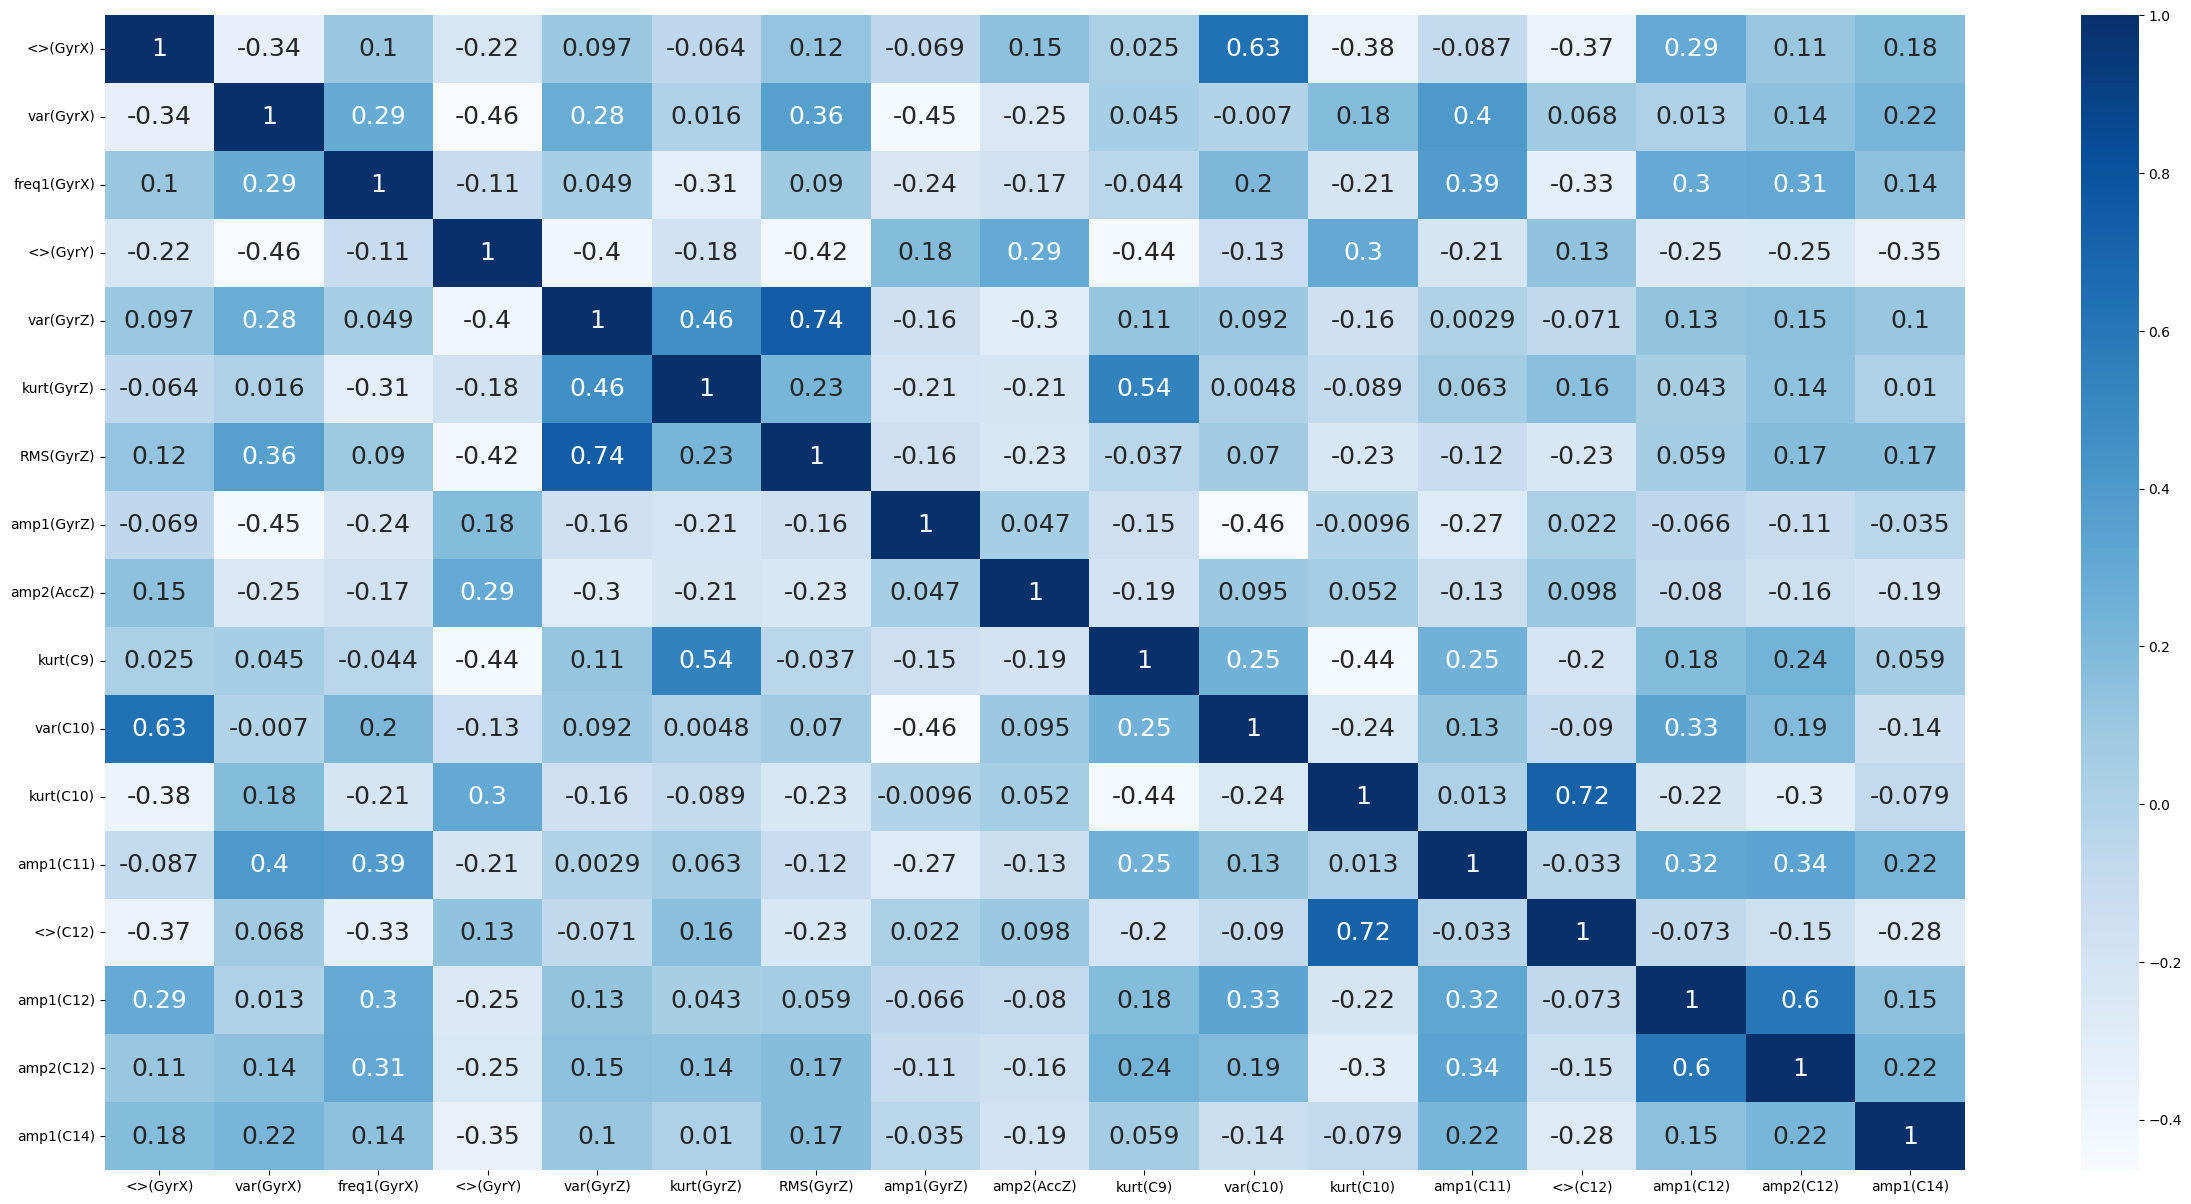

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(162, 17)
(1461, 17)
(162, 1)
(1461, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy"),
    RandomForestClassifier(n_estimators = 1, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.75757576 0.81818182 0.875      0.875      0.8125    ]
Accuracy: 0.82 	 ---> LogisticRegression 
Test: 0    1
Name: Guasto_test, dtype: int64


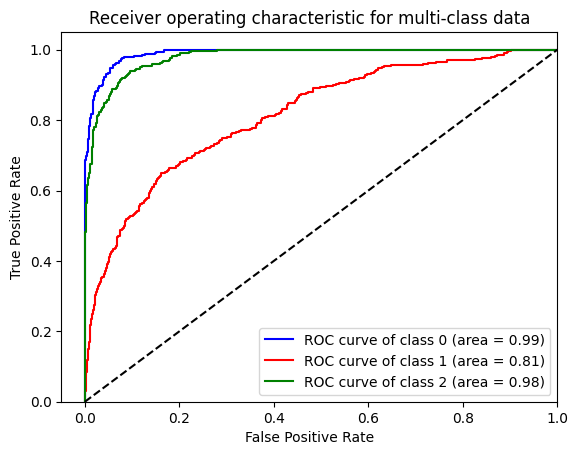

----------------------------------------------------
Cross-Validation: [0.93939394 0.93939394 1.         1.         0.90625   ]
Accuracy: 0.92 	 ---> DecisionTreeClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


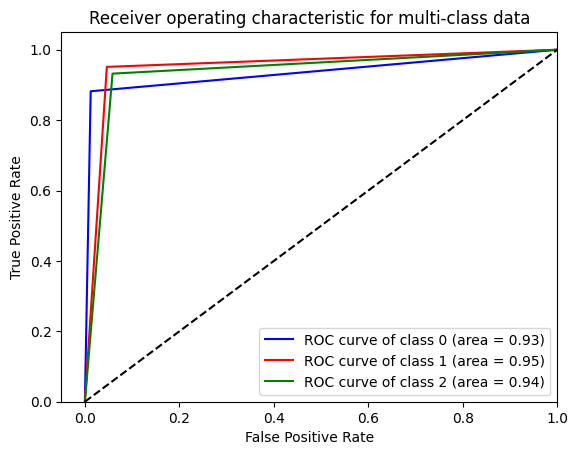

----------------------------------------------------
Cross-Validation: [1.         0.93939394 0.84375    0.875      0.96875   ]
Accuracy: 0.92 	 ---> RandomForestClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


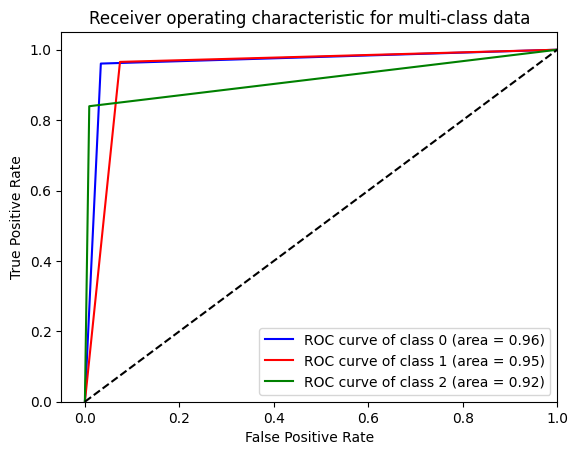

----------------------------------------------------
Cross-Validation: [1.         0.96969697 1.         1.         0.9375    ]
Accuracy: 0.97 	 ---> GradientBoostingClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


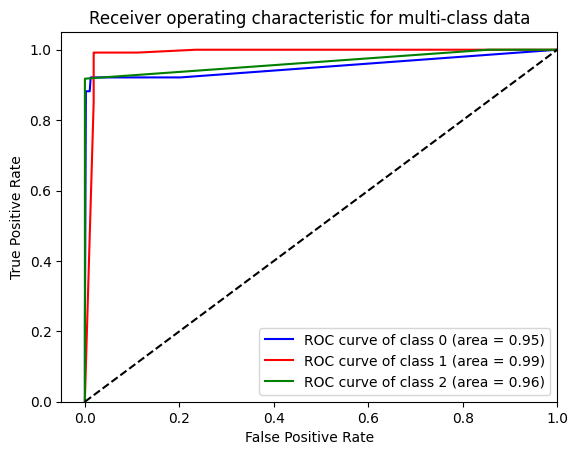

----------------------------------------------------
Cross-Validation: [0.66666667 0.66666667 0.84375    0.6875     0.84375   ]
Accuracy: 0.6 	 ---> AdaBoostClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


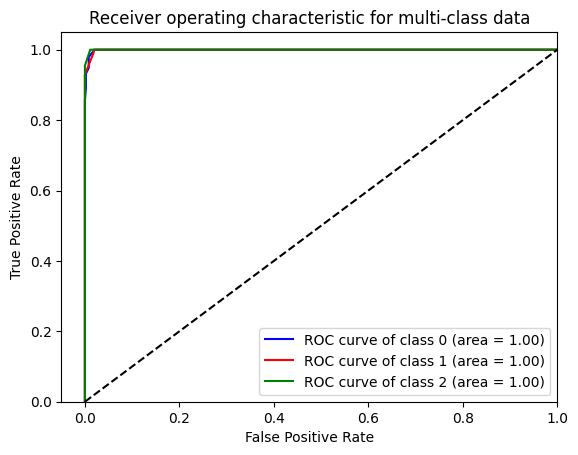

----------------------------------------------------
Cross-Validation: [0.96969697 0.96969697 0.96875    1.         0.9375    ]
Accuracy: 0.99 	 ---> LinearDiscriminantAnalysis 
Test: 0    1
Name: Guasto_test, dtype: int64


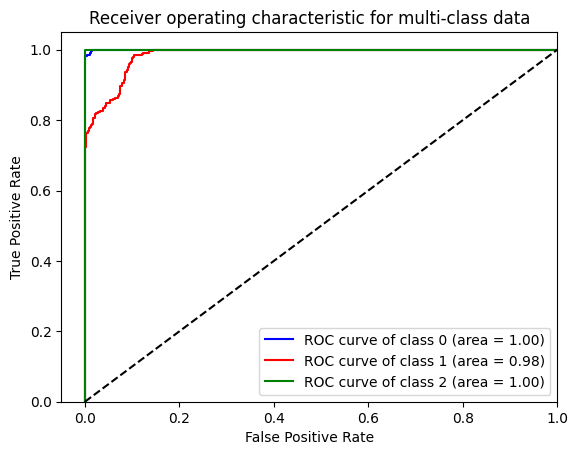

----------------------------------------------------
Cross-Validation: [0.81818182 0.81818182 0.8125     0.65625    0.75      ]
Accuracy: 0.77 	 ---> SVC 
Test: 0    1
Name: Guasto_test, dtype: int64


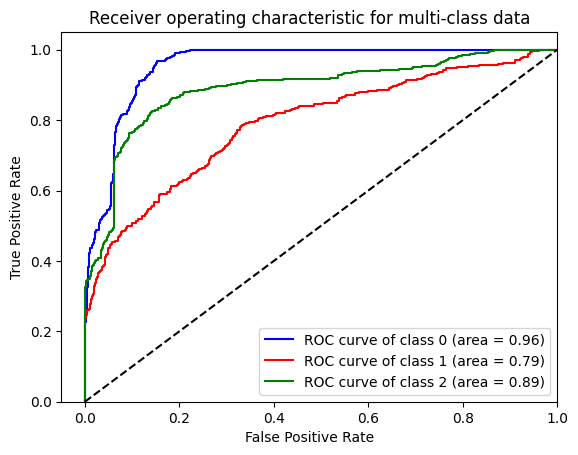

----------------------------------------------------
Cross-Validation: [0.72727273 0.84848485 0.84375    0.875      0.71875   ]
Accuracy: 0.78 	 ---> MLPClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


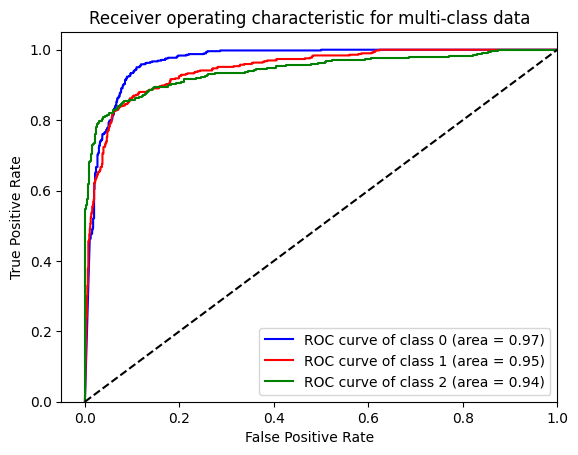

----------------------------------------------------
Cross-Validation: [0.48484848 0.57575758 0.65625    0.5625     0.8125    ]
Accuracy: 0.68 	 ---> SGDClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64


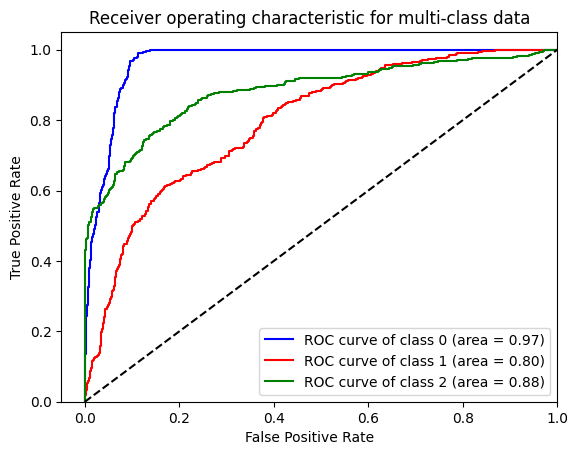

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if (j == 1) | (j == 2) |(j == 7):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

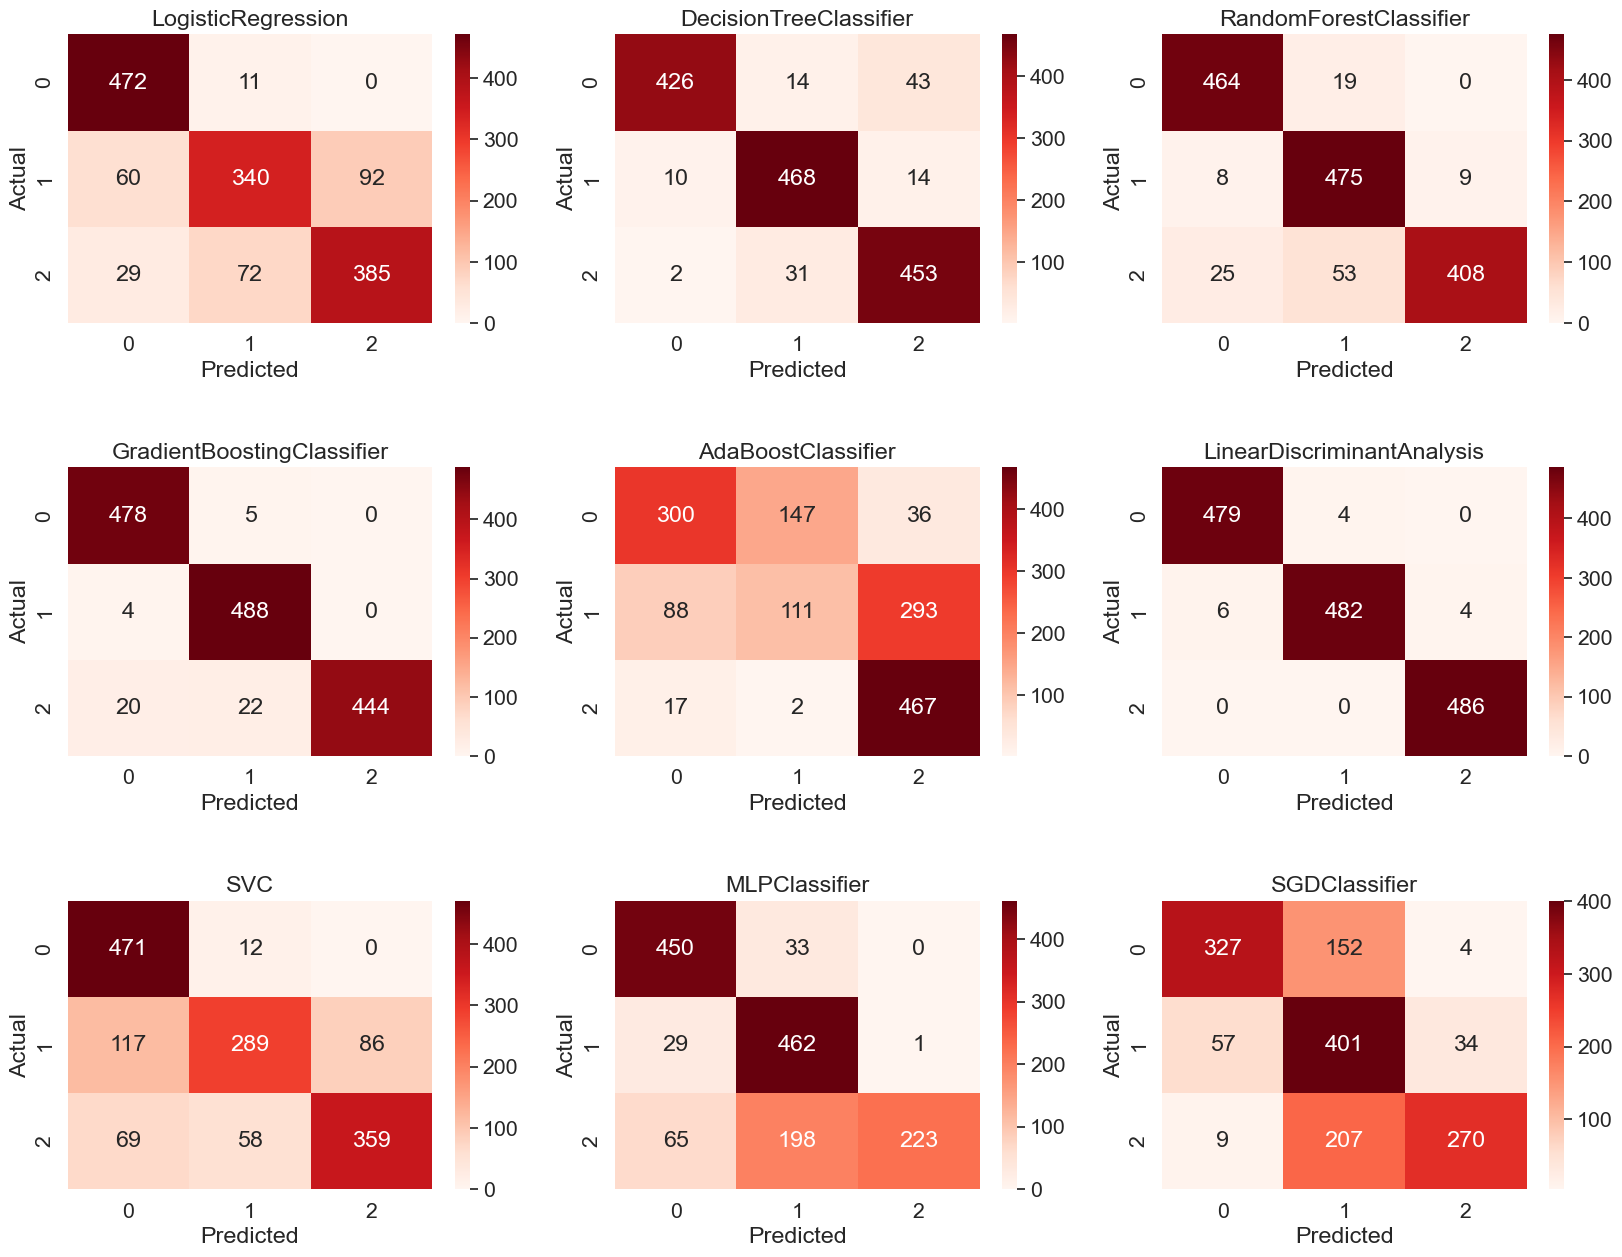

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

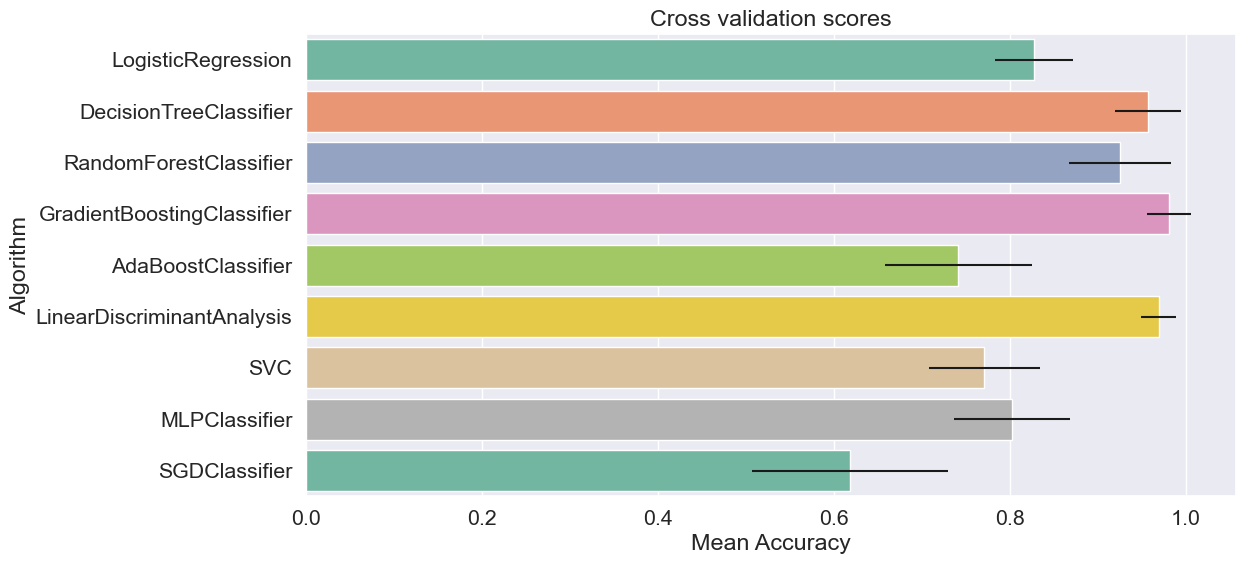

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       483
           1       0.80      0.69      0.74       492
           2       0.81      0.79      0.80       486

    accuracy                           0.82      1461
   macro avg       0.82      0.82      0.82      1461
weighted avg       0.82      0.82      0.82      1461

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       483
           1       0.91      0.95      0.93       492
           2       0.89      0.93      0.91       486

    accuracy                           0.92      1461
   macro avg       0.92      0.92      0.92      1461
weighted avg       0.92      0.92      0.92      1461

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      